# MODEL TRAINING

In [2]:
## Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
## Set the default style for seaborn
sns.set(style="whitegrid")  
## Modelling and evaluation libraries
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR


In [3]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

## Import Data

In [4]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Prepare X and Y

We take `math_score` as the dependant variable (y).

In [6]:
y = df['math score']
X = df.drop(columns=['math score'])

In [ ]:
y.shape

(1000,)

In [7]:
X.shape

(1000, 7)

In [9]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
## Create ColumnTransformer with 3 types of transformers.
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pre_processor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(), cat_features),
        ("numerical", StandardScaler(), num_features)
    ]
)

In [12]:
X = pre_processor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

#### Create an evaluate function to give all metrics after model_training

In [19]:
def evaluate_model(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    mae = mean_absolute_error(true, pred)
    
    # print(f"RMSE: {rmse:.2f}, R2: {r2:.2f}, MAE: {mae:.2f}")
    
    return rmse, r2, mae

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Machine": SVR(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "XGBoost": XGBRegressor(eval_metric='rmse')
}

model_list = []
r2_list = []


In [20]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]

    model.fit(X_train, y_train)
    # make predictions
    y_test_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)

    # evaluate train and test data predictions
    # print(f"Model: {model_name}")

    model_train_rmse, model_train_r2, model_train_mae = evaluate_model(y_train, Y_train_pred)
    model_test_rmse, model_test_r2, model_test_mae = evaluate_model(y_test, y_test_pred)

    print("Model performance for training set")
    print(f"{model_name} - Train RMSE: {model_train_rmse:.2f}, Train R2: {model_train_r2:.2f}, Train MAE: {model_train_mae:.2f}")
    print("Model performance for test set")
    print(f"{model_name} - Test RMSE: {model_test_rmse:.2f}, Test R2: {model_test_r2:.2f}, Test MAE: {model_test_mae:.2f}")
    print("-" * 50) 
    
    model_list.append(model_name)
    r2_list.append(model_test_r2)


Model performance for training set
Linear Regression - Train RMSE: 5.32, Train R2: 0.87, Train MAE: 4.27
Model performance for test set
Linear Regression - Test RMSE: 5.39, Test R2: 0.88, Test MAE: 4.21
--------------------------------------------------
Model performance for training set
Ridge Regression - Train RMSE: 5.32, Train R2: 0.87, Train MAE: 4.26
Model performance for test set
Ridge Regression - Test RMSE: 5.39, Test R2: 0.88, Test MAE: 4.21
--------------------------------------------------
Model performance for training set
Lasso Regression - Train RMSE: 6.59, Train R2: 0.81, Train MAE: 5.21
Model performance for test set
Lasso Regression - Test RMSE: 6.52, Test R2: 0.83, Test MAE: 5.16
--------------------------------------------------
Model performance for training set
K-Nearest Neighbors - Train RMSE: 5.71, Train R2: 0.86, Train MAE: 4.52
Model performance for test set
K-Nearest Neighbors - Test RMSE: 7.25, Test R2: 0.78, Test MAE: 5.62
-----------------------------------

In [21]:
pd.DataFrame({
    "Model": model_list,
    "R2 Score": r2_list
}).sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

,Model,R2 Score
0,Ridge Regression,0.880593
1,Linear Regression,0.880433
2,Gradient Boosting,0.872075
3,Random Forest,0.854136
4,AdaBoost,0.851690
5,CatBoost,0.851632
6,XGBoost,0.827797
7,Lasso Regression,0.825320
8,K-Nearest Neighbors,0.783813
9,Decision Tree,0.759697


Above we can see the list of models and the corresponding R2 score.

We will go with Linear Regression as there is hardly any difference.

#### Linear Regression

In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R2 Score of Linear Regression Model: {score:.2f}")

R2 Score of Linear Regression Model: 0.88


Plot `y_test` and `y_pred`.

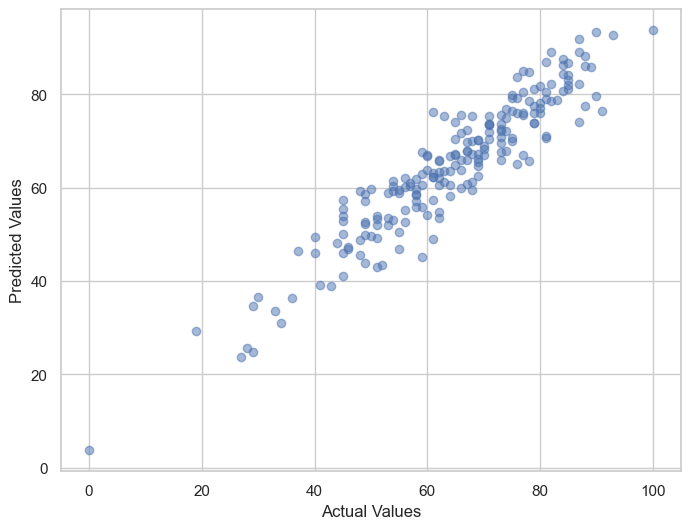

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show();

<Axes: xlabel='math score'>

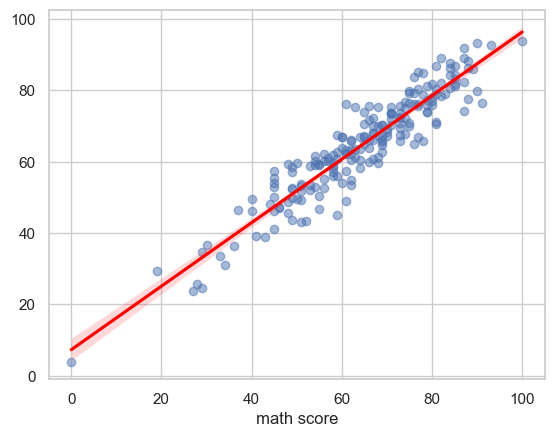

In [24]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})

Difference between actual and predicted values

In [28]:
pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred,
    "pc_difference": np.round((y_test - y_pred) / y_test * 100)
})

pred_df.head(10)

,Actual,Predicted,Difference,pc_difference
521,91,76.387970,14.612030,16.0
737,53,58.885970,-5.885970,-11.0
740,80,76.990265,3.009735,4.0
660,74,76.851804,-2.851804,-4.0
411,84,87.627378,-3.627378,-4.0
678,81,79.014024,1.985976,2.0
626,69,64.654609,4.345391,6.0
513,54,53.007919,0.992081,2.0
859,87,74.184710,12.815290,15.0
136,51,49.213538,1.786462,4.0


<Axes: xlabel='pc_difference', ylabel='Count'>

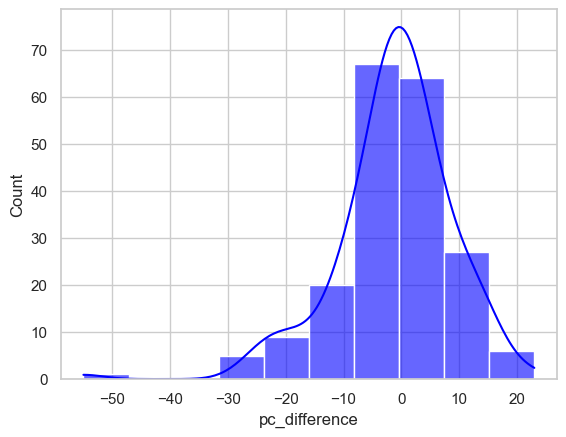

In [31]:
sns.histplot(pred_df['pc_difference'], kde=True, bins=10, color='blue', alpha=0.6)